In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read Data
data = pd.read_csv('World Population-1.csv')
data.head()

,Rank,Country,Region,Population,Percentage,Date
0,1,China,Asia,1411778724,17.80%,20-Nov
1,2,India,Asia,1386141732,17.50%,21-Dec
2,3,United States,Americas,332960297,4.20%,21-Dec
3,4,Indonesia,Asia,271350000,3.43%,20-Dec
4,5,Pakistan,Asia,225200000,2.84%,21-Jul


In [3]:
# Print the shape of data
data.shape

(241, 6)

In [4]:
# Check for null values in the data set
data.isnull().sum()

Rank          0
Country       0
Region        0
Population    0
Percentage    0
Date          0
dtype: int64

In [5]:
#No of countries and region
n_country = len(data['Country'].unique())
n_region = len(data['Region'].unique())
print(f'There are {n_country} countries from {n_region} regions')

There are 241 countries from 5 regions


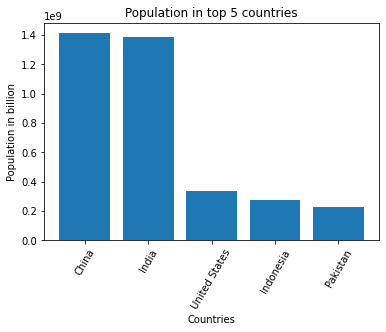

In [6]:
#Population of top 5 countries
plt.bar(data['Country'][:5],data['Population'][:5])
plt.xlabel("Countries")
plt.xticks(rotation=60)
plt.ylabel("Population in billion")
plt.title("Population in top 5 countries")
plt.show()

In [7]:
#Percetnage of population in top 5 countries
pop_5 = data['Population'][:5].sum()
pop_5_per = 0
for i in data['Percentage'][:5]:
    per = float(i.replace('%',''))
    pop_5_per += per
    
print(f'From the top 5 countries with highest population we have {pop_5} people which is {round(pop_5_per,2)}% of world population')

From the top 5 countries with highest population we have 3627430753 people which is 45.77% of world population


     Region  Population
0    Africa  1345290019
1  Americas  1024609723
2      Asia  4628780973
3    Europe   747044106
4   Oceania    43609090


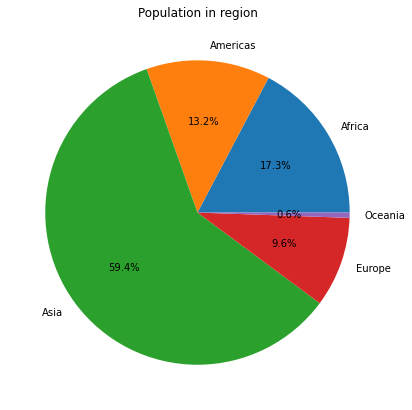

In [8]:
#Population in region
region_population = data.groupby(['Region'], as_index=False)['Population'].sum()
print(region_population)

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.pie(region_population['Population'],labels = region_population['Region'],autopct='%1.1f%%')
plt.title("Population in region")
plt.show()

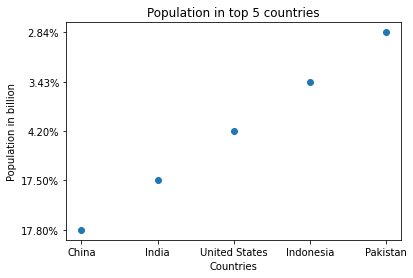

In [9]:
#Population of top 5 countries
plt.scatter(data['Country'][:5],data['Percentage'][:5])
plt.xlabel("Countries")
plt.ylabel("Population in billion")
plt.title("Population in top 5 countries")
plt.show()

In [10]:
#mean population of each region
region_mean = data.groupby(['Region'], as_index=False)['Population'].mean()
region_mean

,Region,Population
0,Africa,2.402304e+07
1,Americas,2.009039e+07
2,Asia,8.571817e+07
3,Europe,1.409517e+07
4,Oceania,1.615151e+06


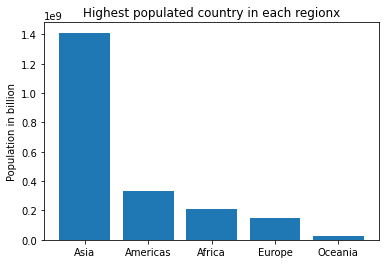

In [11]:
# Highest populatesd country in each region
reg_h = data.groupby(['Region'])['Population'].transform(max) == data['Population']
data[reg_h]
high_country = data[reg_h]['Country'].to_list()
high_region = data[reg_h]['Region'].to_list()
high_population = data[reg_h]['Population'].to_list()

plt.bar(high_region,high_population)
plt.ylabel("Population in billion")
plt.title("Highest populated country in each regionx")
plt.show()

In [12]:
for i in range(5):
    print(f'From {high_region[i]} it is {high_country[i]} with a population of {high_population[i]}')

From Asia it is China with a population of 1411778724
From Americas it is United States with a population of 332960297
From Africa it is Nigeria with a population of 211401000
From Europe it is Russia with a population of 146171015
From Oceania it is Australia with a population of 25922849
